In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd


def analyze_two_checkins(file_path: str):
    """
    Analyze users with exactly 2 check-ins:
    - Compute the time difference between the first and second check-in.
    - Plot the distribution of those time differences (in minutes),
    including mean and standard deviation in the plot.
    """
    if not Path(file_path).exists():
        print(f"❌ File not found: {file_path}")
        return

    # Load data
    df = pd.read_csv(file_path, parse_dates=["Fecha_Transaccion"])

    if "Numero_Tarjeta" not in df.columns or "Fecha_Transaccion" not in df.columns:
        print("❌ Missing required columns: 'Numero_Tarjeta' or 'Fecha_Transaccion'")
        return

    # Sort by card and transaction time
    df = df.sort_values(["Numero_Tarjeta", "Fecha_Transaccion"])

    # Count check-ins per card
    counts = df["Numero_Tarjeta"].value_counts()

    # Keep only cards with exactly two check-ins
    two_checkins_cards = counts[counts == 2].index
    df_two = df[df["Numero_Tarjeta"].isin(two_checkins_cards)]

    # Compute time difference between 1st and 2nd check-in for each card
    diffs = (
        df_two.groupby("Numero_Tarjeta")["Fecha_Transaccion"]
        .apply(lambda x: (x.iloc[1] - x.iloc[0]).total_seconds() / 60.0)  # minutes
        .reset_index(name="minutes_diff")
    )

    mean_diff = diffs["minutes_diff"].mean()
    std_diff = diffs["minutes_diff"].std()

    print(f"📊 Users with exactly 2 check-ins: {len(diffs)}")
    print(f"⏱️ Mean time difference: {mean_diff:.2f} minutes")
    print(f"📈 Standard deviation: {std_diff:.2f} minutes")

    # Plot the distribution
    plt.figure(figsize=(10, 5))
    plt.hist(diffs["minutes_diff"], bins=50, edgecolor="black", alpha=0.7)
    plt.title("Distribution of Time Differences Between Two Check-ins")
    plt.xlabel("Time Difference (minutes)")
    plt.ylabel("Number of Users")
    plt.grid(True, linestyle="--", alpha=0.6)

    # --- Add mean and std deviation text box ---
    text_str = f"Mean = {mean_diff:.2f} min\nStd Dev = {std_diff:.2f} min"
    plt.text(
        0.97,
        0.95,
        text_str,
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray"),
    )

    plt.tight_layout()
    plt.show()

    return diffs

📊 Users with exactly 2 check-ins: 553754
⏱️ Mean time difference: 473.47 minutes
📈 Standard deviation: 235.22 minutes


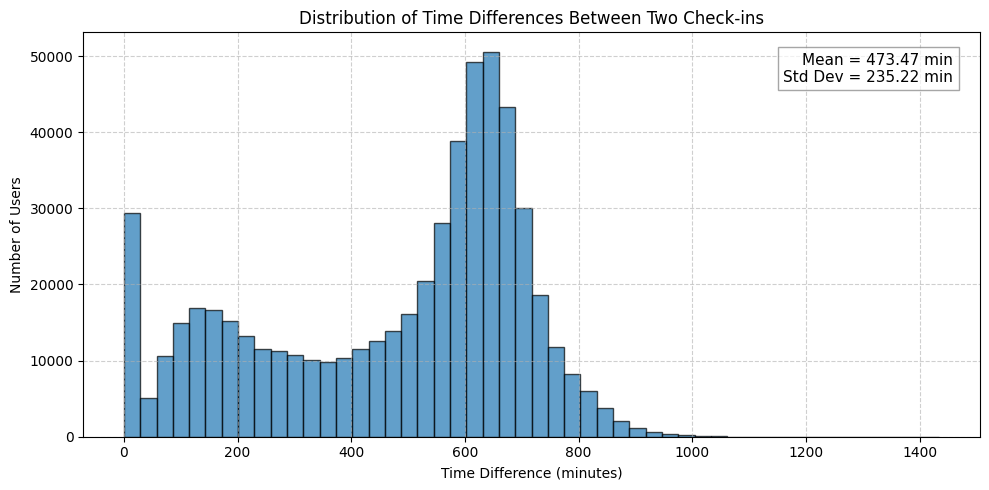

,Numero_Tarjeta,minutes_diff
0,000022fca833a0b877086a0c1dca0a65a58ab5b3c4ddef...,626.833333
1,00003d8d9526dde0d26dd628b8610379d63e1ba7c94fbd...,462.566667
2,000069a59c6820b024e543b805cb92822ca368288bb5ee...,585.966667
3,0000943532f77511cacaddd7c130deccf53d0e69bb6ad9...,186.783333
4,000096a4c06d81a812b20bb5997613b4f6f507bcc0e559...,0.083333
...,...,...
553749,fffe6603b9f97eaafd578d39c6e096b499d02fd73b3d5c...,752.800000
553750,fffebde45a00d6f7df51bf85548d8a2eebb96a6a62a747...,206.166667
553751,ffff3d212eff6dace04f33a0559d67ea2b06c1372e9fb3...,254.333333
553752,ffff707eff36f2160381f162d9e84128920eb0a4653eb1...,0.150000


In [3]:
file_path = "../../../../data/check_ins/daily/20251014.csv"
analyze_two_checkins(file_path)

In [4]:
def count_multiple_checkins(file_path: str):
    """
    Analyze and visualize the number of check-ins per user.

    - Counts how many unique Numero_Tarjeta values have multiple check-ins.
    - Plots the distribution of number of check-ins for those users, showing mean and std.
    """
    if not Path(file_path).exists():
        print(f"❌ File not found: {file_path}")
        return

    # Load data
    df = pd.read_csv(file_path)

    if "Numero_Tarjeta" not in df.columns:
        print("❌ 'Numero_Tarjeta' column not found in file.")
        return

    # Count occurrences per card
    counts = df["Numero_Tarjeta"].value_counts()

    # Filter cards with more than one check-in
    repeated_cards = counts[counts > 1]

    print(f"📅 File: {file_path}")
    print(f"💳 Total unique cards: {counts.shape[0]}")
    print(f"🔁 Cards with >1 check-in: {repeated_cards.shape[0]}")
    print(f"📈 Total repeated check-in records: {df.shape[0] - counts.shape[0]}")

    # Summary stats
    mean_val = repeated_cards.mean()
    std_val = repeated_cards.std()

    print("\n📊 Distribution summary:")
    print(repeated_cards.describe())

    # --- Plot distribution ---
    plt.figure(figsize=(10, 5))
    plt.hist(
        repeated_cards,
        bins=range(2, repeated_cards.max() + 2),
        edgecolor="black",
        alpha=0.7,
    )
    plt.title("Distribution of Number of Check-ins per Card (for users with >1)")
    plt.xlabel("Number of Check-ins")
    plt.ylabel("Number of Users")
    plt.grid(True, linestyle="--", alpha=0.6)

    # Annotate mean and std in the plot
    text_str = f"Mean = {mean_val:.2f}\nStd Dev = {std_val:.2f}"
    plt.text(
        0.97,
        0.95,
        text_str,
        transform=plt.gca().transAxes,
        fontsize=11,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="gray"),
    )

    plt.tight_layout()
    plt.show()

    return repeated_cards

📅 File: ../../../../data/check_ins/daily/20251014.csv
💳 Total unique cards: 1139258
🔁 Cards with >1 check-in: 653250
📈 Total repeated check-in records: 785140

📊 Distribution summary:
count    653250.000000
mean          2.201898
std           0.554065
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          37.000000
Name: count, dtype: float64


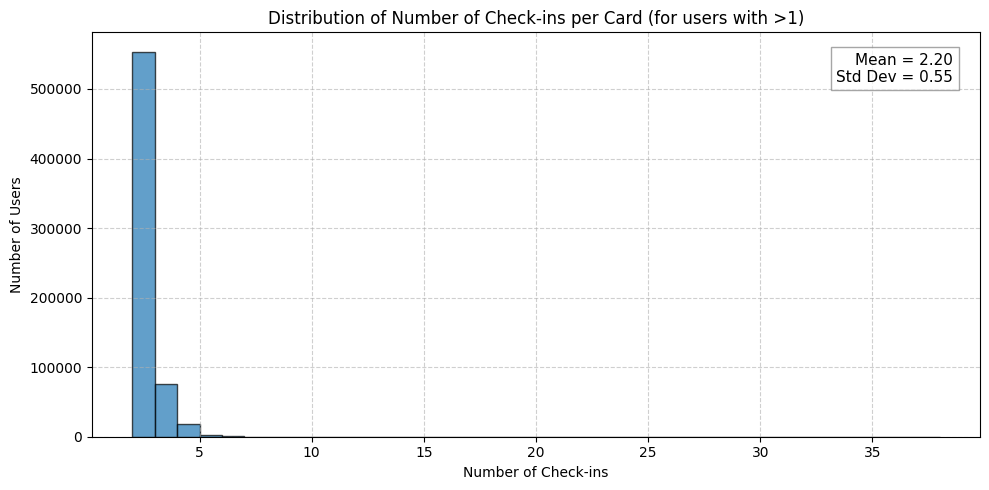

In [5]:
file_path = "../../../../data/check_ins/daily/20251014.csv"
repeated_cards = count_multiple_checkins(file_path)